In [1]:
#This notebook will let you run BBii-Decon with Non-Local Means (NLM) denoising
#Dependencies are bbii-decon, matplotlib, numpy, pypher, scikit-image, scipy, tifffile, time 
#Author: Graham Dellaire

#Load dependencies

import scipy.io
import glob2 as glob
import matplotlib.pyplot as plt
from pypher.pypher import psf2otf
import scipy.signal
import numpy as np
import time
import tifffile as tiff
from tifffile import imsave, imread
from bbii_decon import bbii
from skimage.restoration import denoise_nl_means, estimate_sigma

In [2]:
#Load TIFF images using tifffile
PSF = tiff.imread('PSF.tif')
img = tiff.imread('nucleus.tif')


BBii-Decon Execution Time:
1.0714778900146484
seconds
Original Image [left] and after BBii-Decon [right]


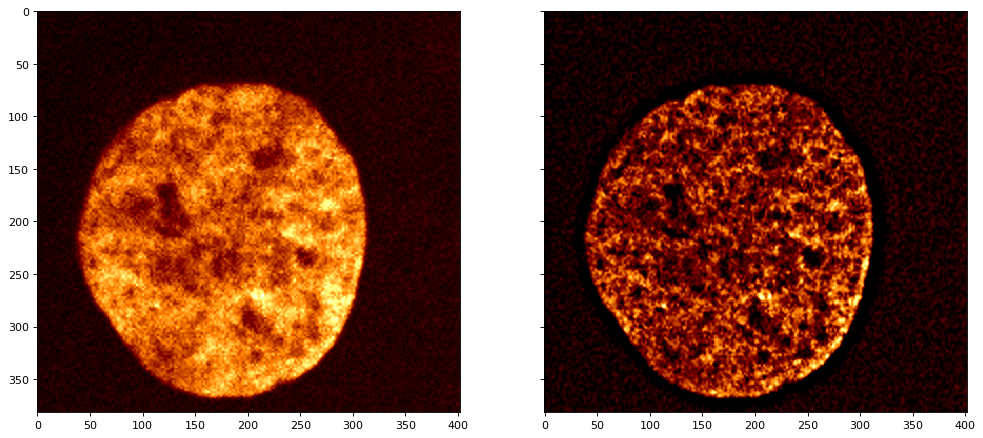

In [3]:
# Start timing of BBii reconstruction
start = time.time()
print("BBii-Decon Execution Time:")

# run the deblurring
[f, alpha, proj] = bbii(PSF, img, 15, 1.0e-08, 0.98)

# end timing of BBii reconstruction
end = time.time()
print(end - start)
print("seconds")    
    
# Compare the orginal image to the deconvolved image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(img, cmap='afmhot')
ax[1].imshow(f, cmap='afmhot')

print('Original Image [left] and after BBii-Decon [right]')    

estimated noise standard deviation = 417.65183066415955
NLM Denoising Execution Time:
4.140799283981323
seconds
Deconvolved Image [left] and after NLM Denoising [right]


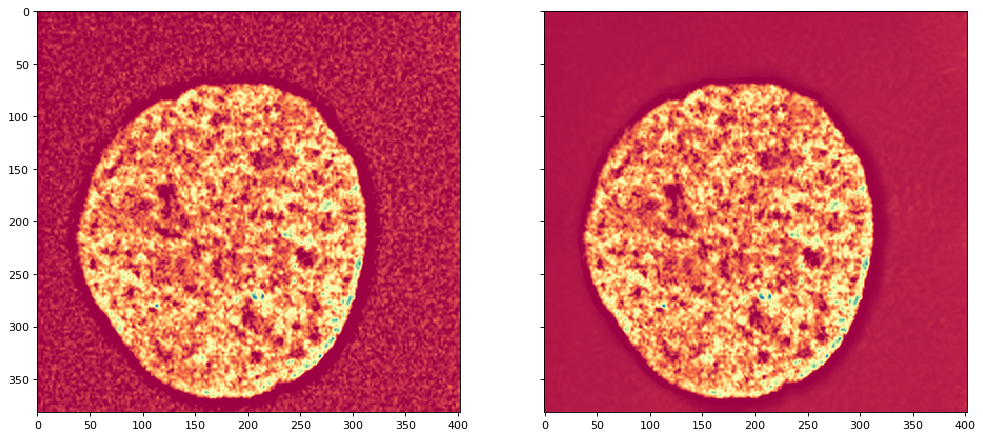

In [4]:
# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(f, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')

# Start timing of BBii reconstruction
start = time.time()
print("NLM Denoising Execution Time:")

# Non local means denoise the deconvolved image
denoised = denoise_nl_means(f, patch_size=15, patch_distance=22, h=800, fast_mode=True, sigma=sigma_est)
    
# end timing of NLM denoising
end = time.time()
print(end - start)
print("seconds")

# Compare the deconvolved to image to the denoised image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(f, cmap='Spectral')
ax[1].imshow(denoised, cmap='Spectral')

print('Deconvolved Image [left] and after NLM Denoising [right]')

Subtracted background [left] and denoised image [right]


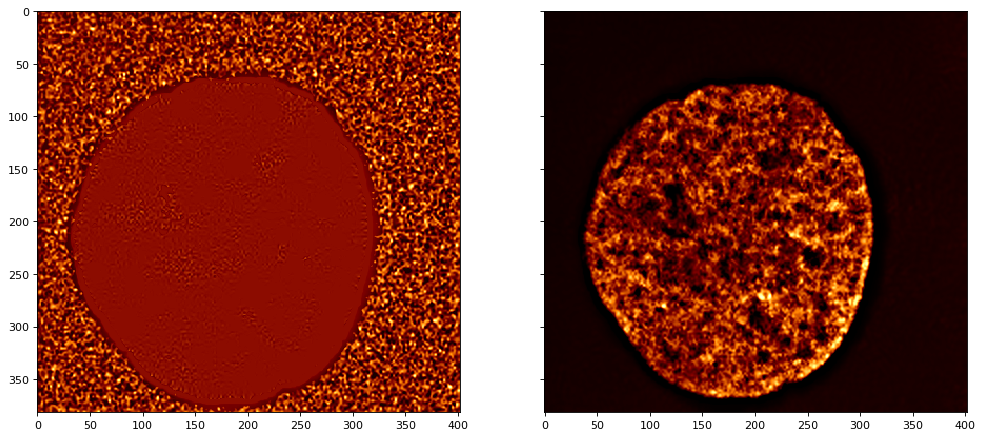

In [5]:
dif = f - denoised

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(dif, cmap='afmhot')
ax[1].imshow(denoised, cmap='afmhot')


print('Subtracted background [left] and denoised image [right]')
